In [1]:
%matplotlib inline
import pandas as pd
import emsalib as emsa
import matplotlib.pyplot as plt

In [2]:
dataset_path = 'data/AliceShort.csv'
header = pd.read_csv(dataset_path, nrows=1, header=None)
header = header.values[0]
alice = pd.read_csv(dataset_path)

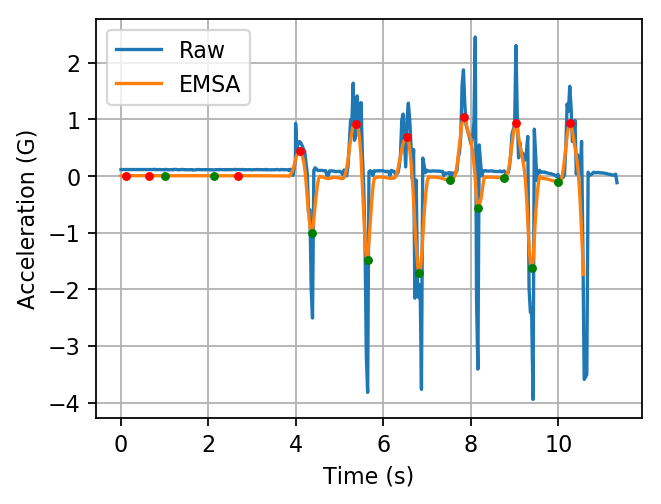

In [13]:
ts = alice['Timestamp'].values
ts_orig = ts - min(ts)
axis = [alice['Axis' + str(i+1)].values for i in range(3)]

axis = emsa.TimeSeries(ts=ts, ys=axis[0])

emsa0 = emsa.EMSA(flt_type='ma', filterLen = 5, searchOrd= 15)

plt.figure(figsize=(4*1.1, 3*1.1), dpi=160)
axis.plot(0,350, 0) 
motifs = emsa0.process(axis)
motifsNoElastic = emsa0.processNoElastic(axis)

axis.plot(0,350,0) 
plt.grid()
plt.legend(['Raw', 'EMSA'])
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (G)')
plt.savefig('EMSA1.png', bbox_inches="tight", pad_inches=0)

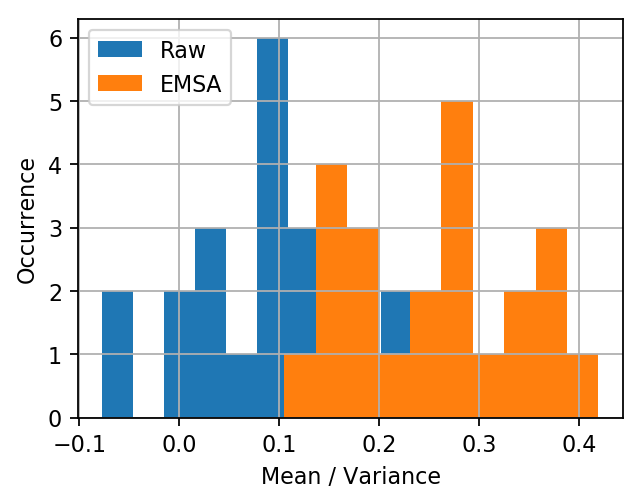

In [14]:
plt.figure(figsize=(4*1.1, 3*1.1), dpi=160)
motifs.plotMean()
motifs.plotVar()
plt.grid()
plt.legend(['Raw', 'EMSA'])
plt.xlabel('Mean / Variance')
plt.ylabel('Occurrence')
plt.savefig('EMSA_motif_mean_var.png', bbox_inches="tight", pad_inches=0)

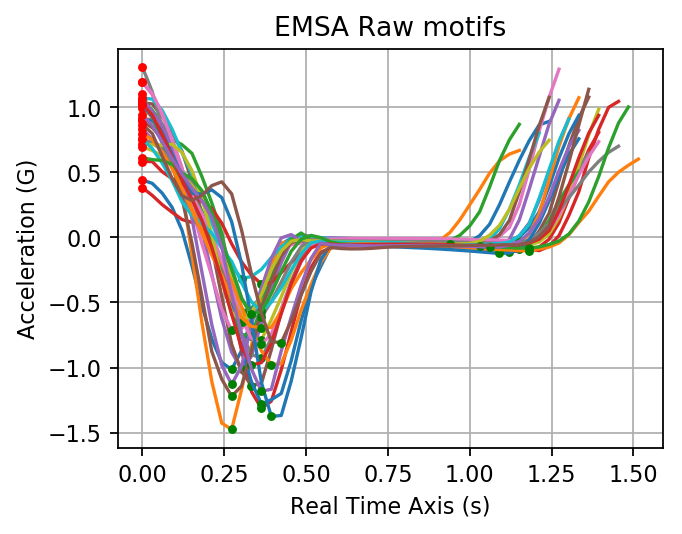

In [15]:
plt.figure(figsize=(4*1.1, 3*1.1), dpi=160)      
motifsNoElastic.plot()
plt.title('EMSA Raw motifs')
plt.xlabel('Real Time Axis (s)')
plt.ylabel('Acceleration (G)')
plt.grid()
plt.savefig('EMSA_wo_elastic_align.png', bbox_inches="tight", pad_inches=0)

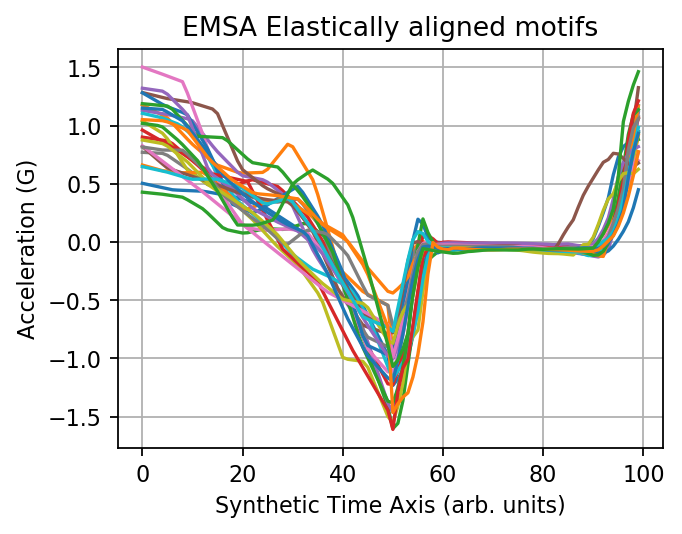

In [16]:
plt.figure(figsize=(4*1.1, 3*1.1), dpi=160)      
motifs.plot()
plt.title('EMSA Elastically aligned motifs')
plt.xlabel('Synthetic Time Axis (arb. units)')
plt.ylabel('Acceleration (G)')
plt.grid()
plt.savefig('EMSA_elastic_align.png', bbox_inches="tight", pad_inches=0)